In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-04-09 14:57:08.938617: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

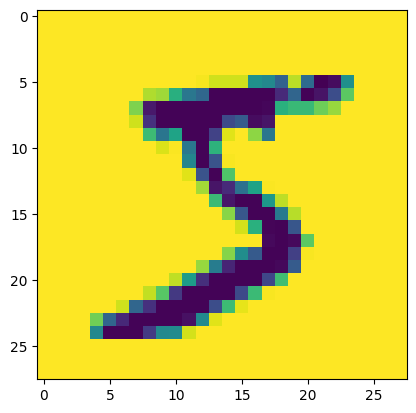

In [19]:
plt.imshow(1-x_train[0]/255)

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255,input_shape=(28,28)),
    tf.keras.layers.Lambda(lambda x:1-x),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 lambda_2 (Lambda)           (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [24]:
cbck=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[cbck])

Epoch 1/100
1875/1875 [==============================] - 27s 13ms/step - loss: 0.4473 - accuracy: 0.8589 - val_loss: 0.2461 - val_accuracy: 0.9218
Epoch 2/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2420 - accuracy: 0.9232 - val_loss: 0.1808 - val_accuracy: 0.9434
Epoch 3/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1881 - accuracy: 0.9411 - val_loss: 0.1455 - val_accuracy: 0.9528
Epoch 4/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1618 - accuracy: 0.9486 - val_loss: 0.1337 - val_accuracy: 0.9566
Epoch 5/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1377 - accuracy: 0.9567 - val_loss: 0.1565 - val_accuracy: 0.9527
Epoch 6/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1302 - accuracy: 0.9588 - val_loss: 0.1444 - val_accuracy: 0.9532
Epoch 7/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1166 - accuracy: 0.9625 - val_loss: 0

In [25]:
model.save('digit_AI_Inverse/1/')

INFO:tensorflow:Assets written to: digit_AI_Inverse/1/assets


INFO:tensorflow:Assets written to: digit_AI_Inverse/1/assets


In [29]:
model=tf.keras.models.load_model('digit_AI')
model.add(tf.keras.layers.Lambda(lambda x:tf.argmax(x,1)))

In [30]:
print(model(x_test[:6]))
y_test[:6]

tf.Tensor([7 2 1 0 4 1], shape=(6,), dtype=int64)


array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [31]:
model.save('digit_AI_argmax/1')

INFO:tensorflow:Assets written to: digit_AI_argmax/1/assets


INFO:tensorflow:Assets written to: digit_AI_argmax/1/assets


In [32]:
base_model=tf.keras.models.load_model('digit_AI')
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.base=base_model
    def call(self,data):
        return tf.argmax(self.base(data),1)
digit_ai_argmax_inherit=MyModel()
print(digit_ai_argmax_inherit(x_test[:6]))
digit_ai_argmax_inherit.save('digit_AI_argmax_inherit/1')

tf.Tensor([7 2 1 0 4 1], shape=(6,), dtype=int64)


INFO:tensorflow:Assets written to: digit_AI_argmax_inherit/1/assets


INFO:tensorflow:Assets written to: digit_AI_argmax_inherit/1/assets
